In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ha936\Downloads\BIKE DETAILS (1).csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
# What is the range of selling prices in the datas
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling_price is {price_range}")


The range of selling_price is 755000


In [5]:
#What is the median selling price for bikes in the dataset
median_price=df['selling_price'].median()
print(f"the median price is {median_price}")

the median price is 45000.0


In [6]:
#What is the most common seller type
seller = df['seller_type'].value_counts()
most_common_seller = seller.idxmax()
print(f"The most common seller type is '{most_common_seller}' with {seller[most_common_seller]} occurrences.")


The most common seller type is 'Individual' with 1055 occurrences.


In [7]:
#How many bikes have driven more than 50,000 kilometers

bikes_over_50k = df[df['km_driven'] > 50000]
count_bikes = bikes_over_50k.shape[0]
print(f"Number of bikes driven more than 50,000 kilometers: {count_bikes}")


Number of bikes driven more than 50,000 kilometers: 170


In [8]:
#What is the average km_driven value for each ownership type

avg_km_per_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_per_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [9]:
#What proportion of bikes are from the year 2015 or older
# Filter bikes from the year 2015 or older
older_bikes = df[df['year'] <= 2015]

# Count of bikes from 2015 or older
older_bikes_count = older_bikes.shape[0]

# Total count of bikes
total_bikes_count = df.shape[0]

# Proportion
proportion = older_bikes_count / total_bikes_count
print(f"The proportion of bikes from 2015 or older is: {proportion:.2%}")

The proportion of bikes from 2015 or older is: 56.64%


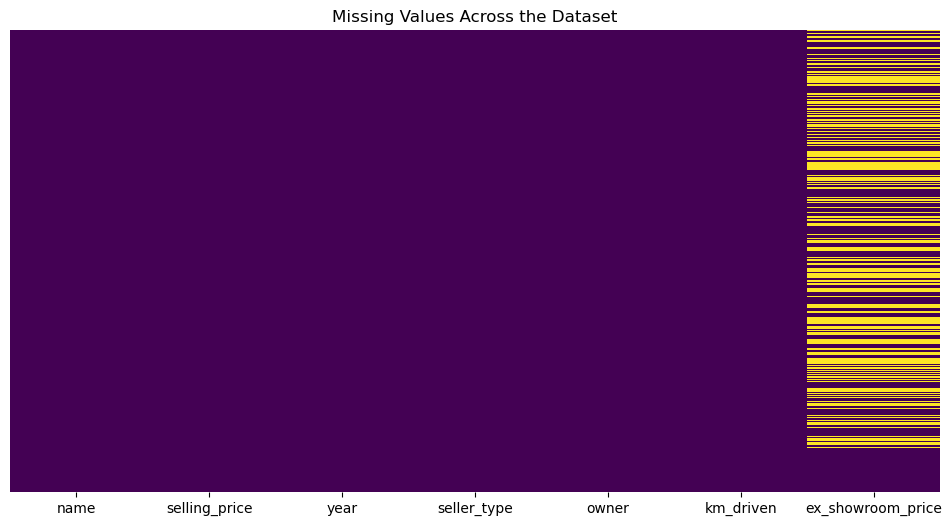

In [10]:
#What is the trend of missing values across the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to visualize missing values across the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Across the Dataset")
plt.show()


In [11]:
#What is the highest ex_showroom_price recorded, and for which bike
df['ex_showroom_price'] = df['ex_showroom_price'].replace(np.nan, 0)
max_index = df['ex_showroom_price'].idxmax()
bike_details = df.loc[max_index]
bike_details

name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object

In [12]:
#What is the total number of bikes listed by each seller type
# Total number of bikes listed by each seller type
seller_type_counts = df['seller_type'].value_counts()

# Display the result
print(seller_type_counts)


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [14]:
#What is the relationship between selling_price and km_driven for first-owner bikes
# Filter for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']

# Calculate the correlation between 'selling_price' and 'km_driven' for first-owner bikes
relationship = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])

# Display the result
print(f"The correlation between selling_price and km_driven for first-owner bikes is {relationship}")


The correlation between selling_price and km_driven for first-owner bikes is nan


In [27]:
#Identify and remove outliers in the km_driven column using the IQR method
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df['km_driven'], 25)
Q3 = np.percentile(df['km_driven'], 75)
IQR = Q3 - Q1

# Determine the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
filtered_df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Number of rows after removing outliers: {filtered_df.shape[0]}")


Number of rows after removing outliers: 1022


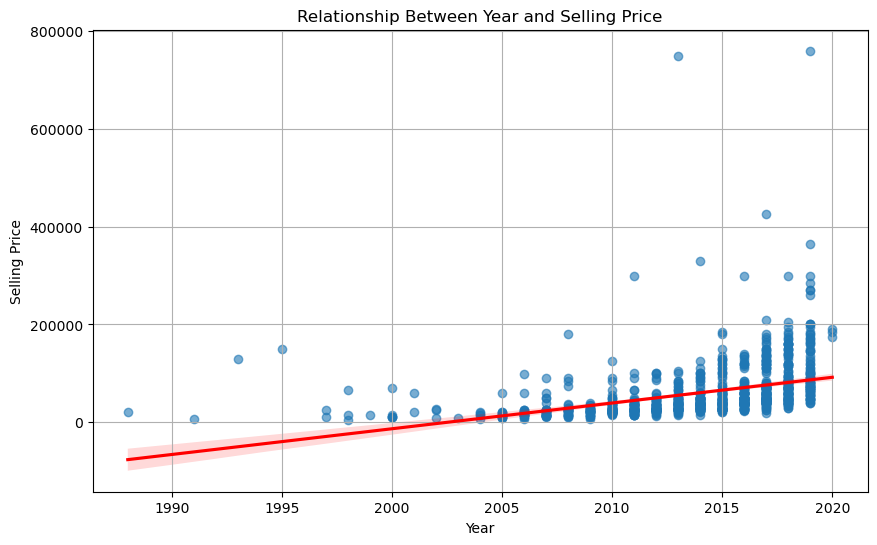

In [29]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df['year'], y=df['selling_price'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship Between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()



In [30]:
#What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
# Add a column for bike age
df['bike_age'] = 2025 - df['year']  # Replace 2025 with the current year if different

# Group by bike age and calculate average selling price
depreciation = df.groupby('bike_age')['selling_price'].mean()

# Display the result
print(depreciation)


bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [31]:
#Which bike names are priced significantly above the average price for their manufacturing year
# Calculate the average price per manufacturing year
avg_price_per_year = df.groupby('year')['selling_price'].mean()

# Merge the average prices back into the dataframe
df['avg_price_year'] = df['year'].map(avg_price_per_year)

# Identify bikes priced significantly above the average (e.g., 1.5 times the average)
df_above_avg = df[df['selling_price'] > 1.5 * df['avg_price_year']]

# Extract the bike names
above_avg_bike_names = df_above_avg['name'].unique()

# Display the result
print("Bikes priced significantly above the average price for their year:")
print(above_avg_bike_names)


Bikes priced significantly above the average price for their year:
['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-Davidson Street 750' 'TV

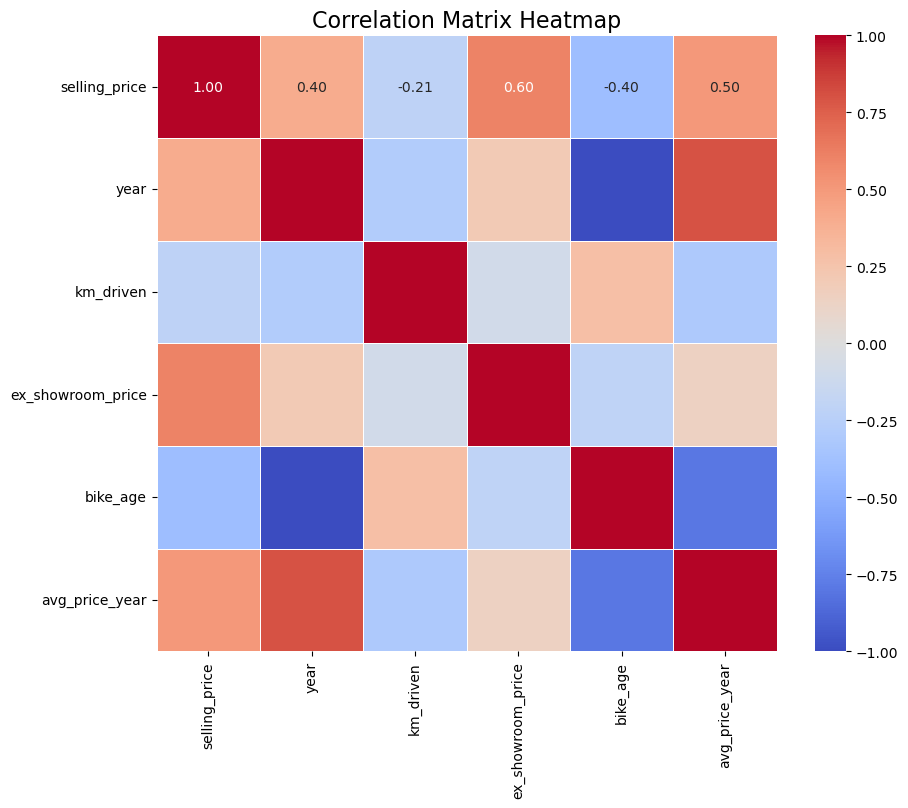

In [33]:
#Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Generate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add titles and labels
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()




### EDA 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ha936\Downloads\Car Sale.csv")

In [3]:
#What is the average selling price of cars for each dealer, and how does it compare across different dealers

# Group by 'Dealer_Name' and calculate the average price
average_price_per_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

# Display the results
print(average_price_per_dealer)

# Optional: Sort the results to compare across dealers
average_price_per_dealer_sorted = average_price_per_dealer.sort_values(ascending=False)
print("Average prices sorted:")
print(average_price_per_dealer_sorted)

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [4]:
# Assuming 'cf' is your DataFrame and 'Price ($)' and 'Company' are the relevant columns
price_variation = df.groupby('Company')['Price ($)'].std()

# Find the car brand with the highest price variation
max_variation_brand = price_variation.idxmax()
max_variation_value = price_variation.max()

print(f"The car brand with the highest price variation is {max_variation_brand} with a variation of {max_variation_value}")


The car brand with the highest price variation is Lincoln with a variation of 19658.050211265567


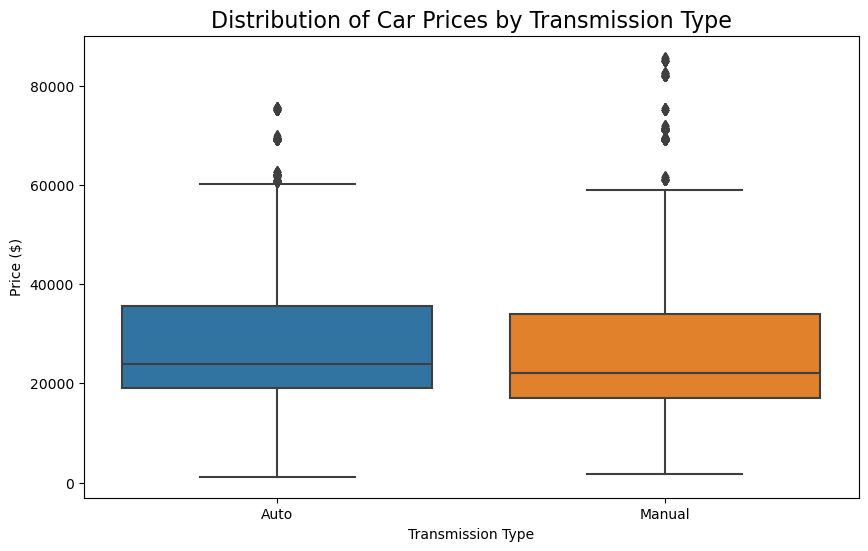

In [5]:
#What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of car prices based on transmission type
plt.figure(figsize=(10,6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)

# Add titles and labels
plt.title('Distribution of Car Prices by Transmission Type', fontsize=16)
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()


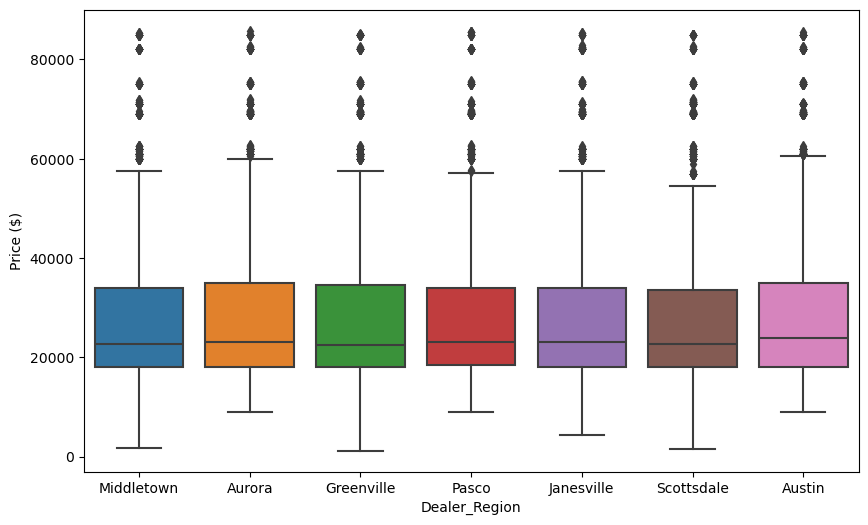

In [6]:
#What is the distribution of car prices across different regions
plt.figure(figsize=(10,6))
sns.boxplot(x='Dealer_Region',y='Price ($)',data=df)
plt.show()

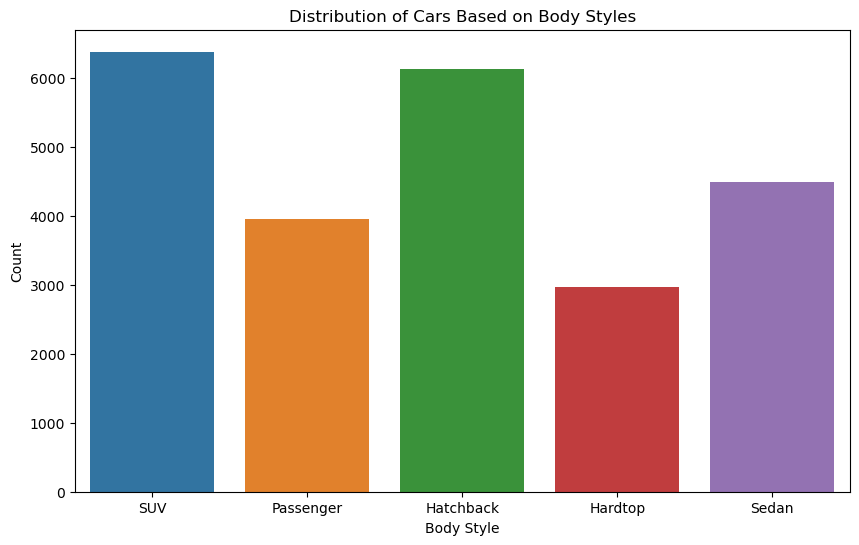

In [7]:
#What is the distribution of cars based on body styles
plt.figure(figsize=(10,6))
sns.countplot(x='Body Style',data=df)
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

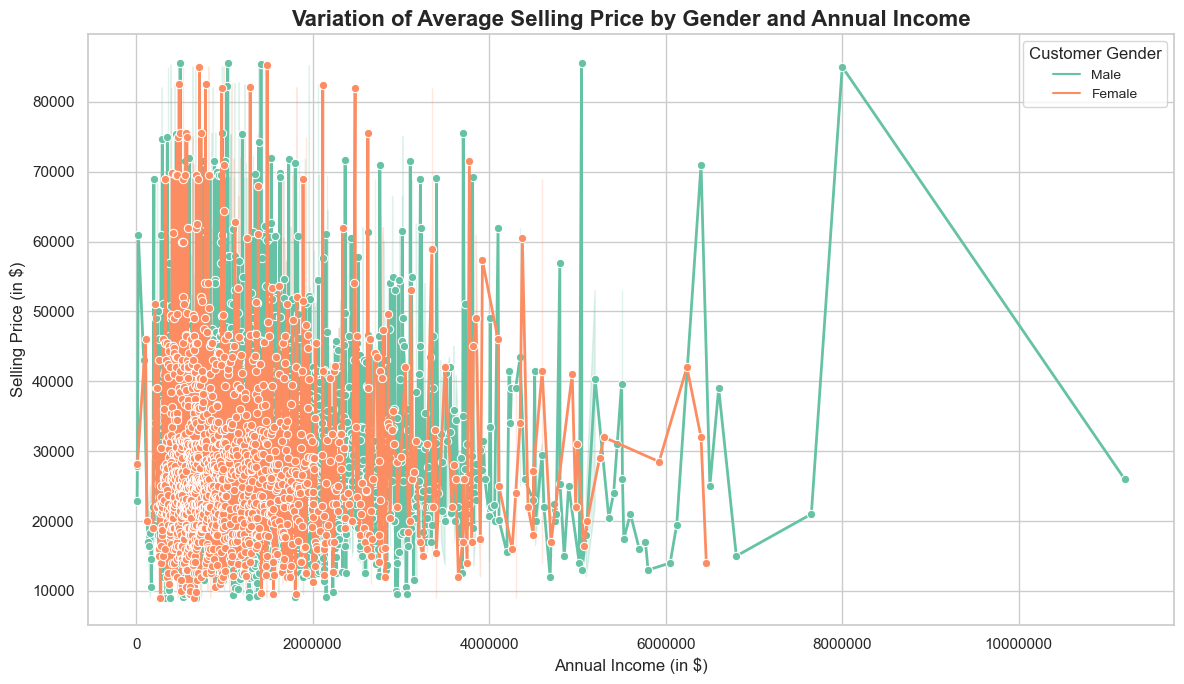

In [8]:
# How does the average selling price of cars vary by customer gender and annual income
# Set figure size and style
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Create the line plot
sns.lineplot(
    x='Annual Income', 
    y='Price ($)', 
    data=df, 
    hue='Gender', 
    marker='o', 
    palette="Set2", 
    linewidth=2
)

# Add title and labels with customization
plt.ticklabel_format(style='plain', axis='x')
plt.title('Variation of Average Selling Price by Gender and Annual Income', fontsize=16, weight='bold')
plt.xlabel('Annual Income (in $)', fontsize=12)
plt.ylabel('Selling Price (in $)', fontsize=12)

# Customize legend
plt.legend(title='Customer Gender', fontsize=10, title_fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Number of Cars Sold by Region')

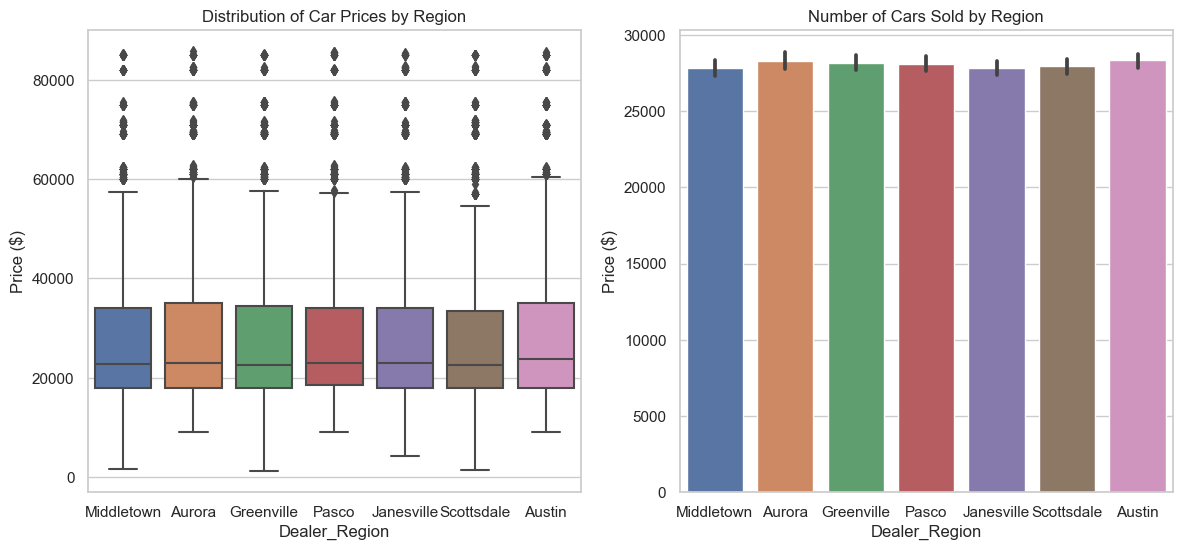

In [9]:
#What is the distribution of car prices by region, and how does the number of cars sold vary by region
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Distribution of Car Prices by Region
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, ax=axes[0])
axes[0].set_title('Distribution of Car Prices by Region')

# Plot 2: Number of Cars Sold by Region
sns.barplot(x='Dealer_Region', y='Price ($)', data=df, ax=axes[1])
axes[1].set_title('Number of Cars Sold by Region')

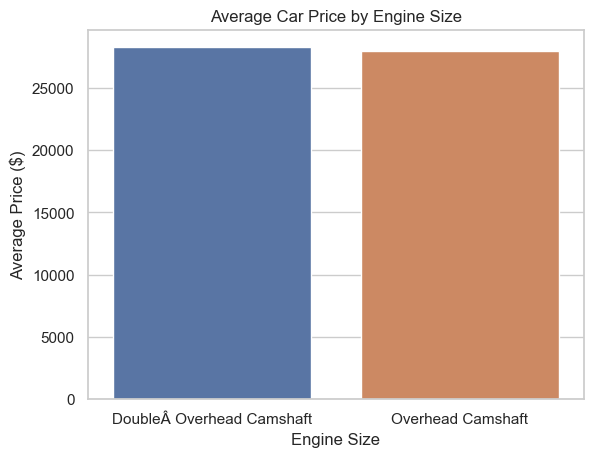

In [10]:
#How does the average car price differ between cars with different engine sizes
avg_car_price = df.groupby('Engine')['Price ($)'].mean()

avg_car_price


# Plotting the average car prices
sns.barplot(x=avg_car_price.index, y=avg_car_price.values)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.show()


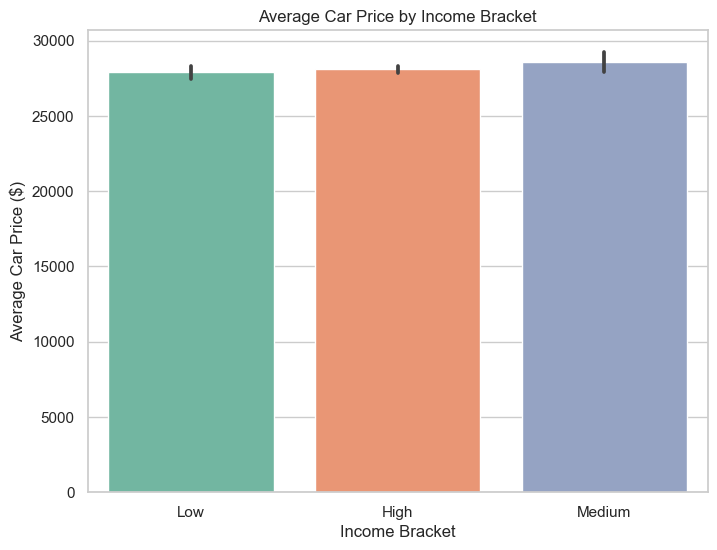

In [11]:
#How do car prices vary based on the customer’s annual income bracket
def categorize_income(income):
    if income <= 50000:
        return 'Low'
    elif 50000 < income <= 500000:
        return 'Medium'
    else:
        return 'High'
df['Income Bracket'] = df['Annual Income'].apply(categorize_income)


plt.figure(figsize=(8, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=df, palette='Set2')
plt.title('Average Car Price by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.show()

In [12]:
# What are the top 5 car models with the highest number of sales, and how does their price distribution look
Top_5_model = df.groupby('Model')['Price ($)'].mean().sort_values(ascending=False).head(5)

# Display the top 5 models with the highest average price
print(Top_5_model)

Model
Catera     56836.933333
DeVille    46154.050000
Contour    45309.079646
Integra    44604.000000
Tacoma     44576.743017
Name: Price ($), dtype: float64


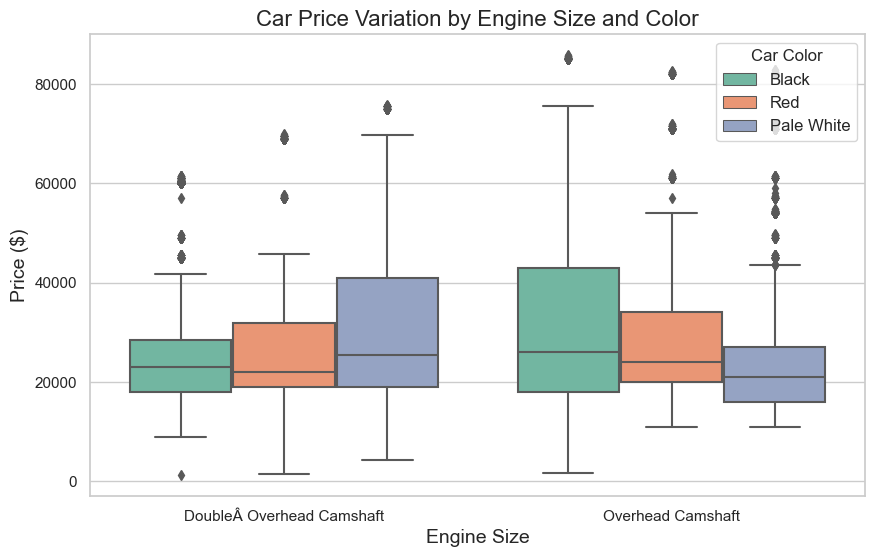

In [13]:
#How does car price vary with engine size across different car colors, and which colors have the highest price variation
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Box Plot: Price variation across engine size, separated by color
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df, palette='Set2')

# Add titles and labels
plt.title('Car Price Variation by Engine Size and Color', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Adjust legend position for clarity
plt.legend(title='Car Color', loc='upper right', fontsize=12)

# Show the plot
plt.show()


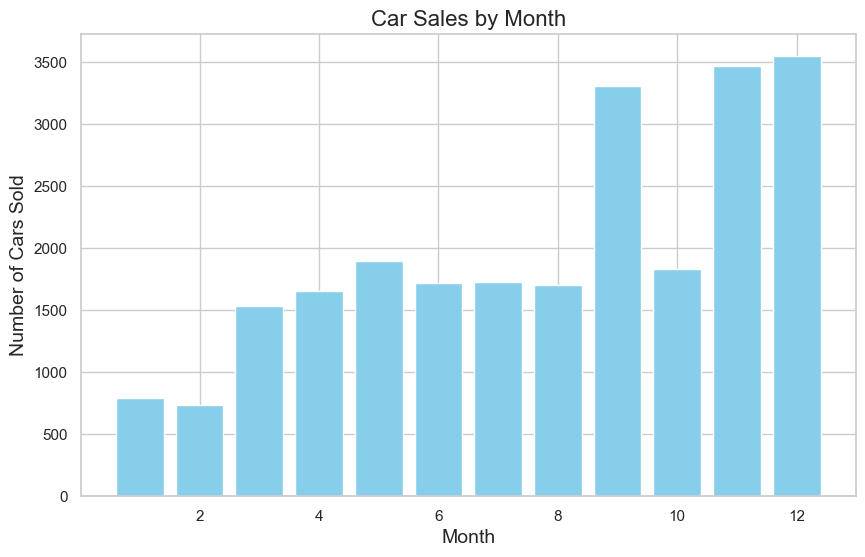

In [14]:
#Is there any seasonal trend in car sales based on the date of sale
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_sales = df['Month'].value_counts().sort_index()

# Plot the bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values, color='skyblue')

# Add titles and labels
plt.title('Car Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)

# Show the plot
plt.show()

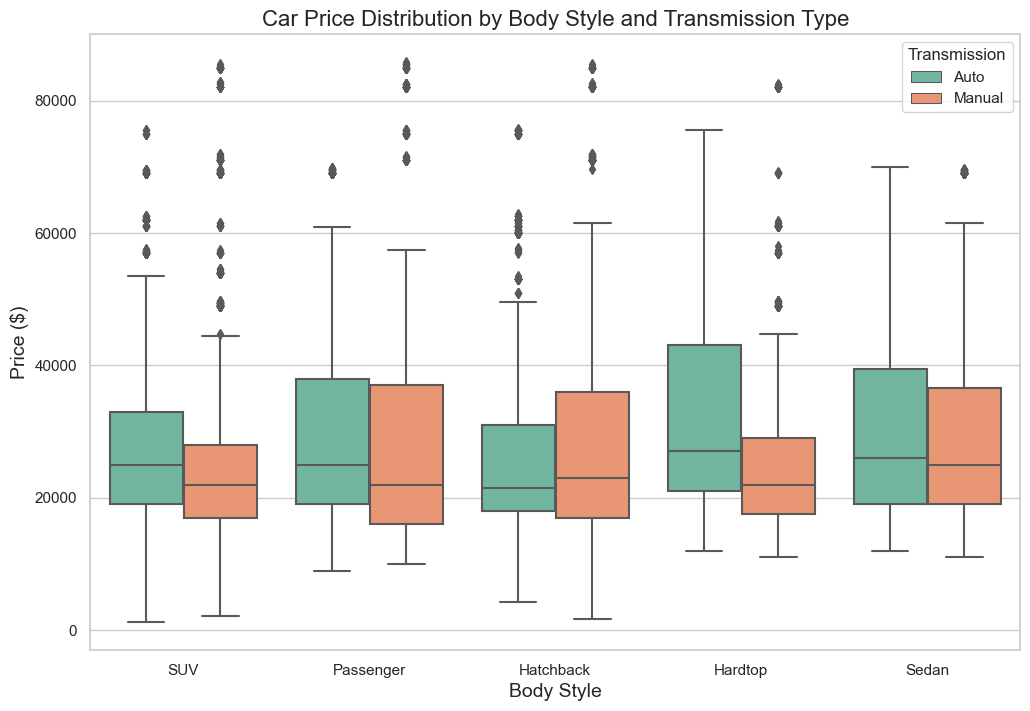

In [15]:
# How does the car price distribution change when considering different combinations of body style and transmission type
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))

# Box Plot: Price distribution across Body Style and Transmission Type
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set2')

# Add titles and labels
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Body Style', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Show the plot
plt.show()

Unique Engine values after cleaning: ['Double Overhead Camshaft' 'Single Overhead Camshaft']
Correlation Matrix:
               Price ($)    Engine  Annual Income
Price ($)       1.000000  0.011271       0.012065
Engine          0.011271  1.000000       0.006598
Annual Income   0.012065  0.006598       1.000000


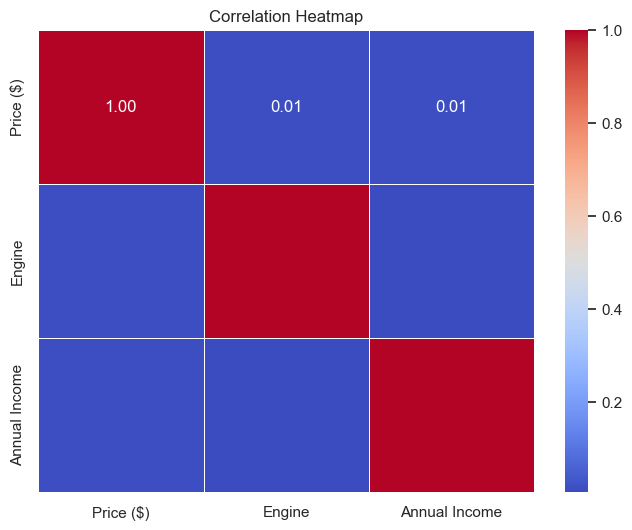

In [16]:
# Clean and encode the 'Engine' column
df['Engine'] = df['Engine'].replace({'DoubleÂ\xa0Overhead Camshaft': 'Double Overhead Camshaft', 
                                      'Overhead Camshaft': 'Single Overhead Camshaft'})
print("Unique Engine values after cleaning:", df['Engine'].unique())

# Map engine types to numerical values
df['Engine'] = df['Engine'].map({'Double Overhead Camshaft': 1, 'Single Overhead Camshaft': 0})

# Select relevant columns for correlation analysis
selected_columns = df[['Price ($)', 'Engine', 'Annual Income']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
df['Engine'] = df['Engine'].map({
    1:'Double Overhead Camshaft', 0:'Single Overhead Camshaft'})

        Model     Price ($)                    Engine
0       3-Sep  37986.380117  Double Overhead Camshaft
1      3000GT  22282.250825  Double Overhead Camshaft
2        300M  21394.888889  Single Overhead Camshaft
3        323i  17355.634615  Single Overhead Camshaft
4        328i  27821.359223  Double Overhead Camshaft
..        ...           ...                       ...
149     Viper  30905.258333  Single Overhead Camshaft
150   Voyager  31491.110497  Double Overhead Camshaft
151  Windstar  23682.842975  Double Overhead Camshaft
152  Wrangler  20134.548780  Double Overhead Camshaft
153    Xterra  18901.076087  Double Overhead Camshaft

[154 rows x 3 columns]


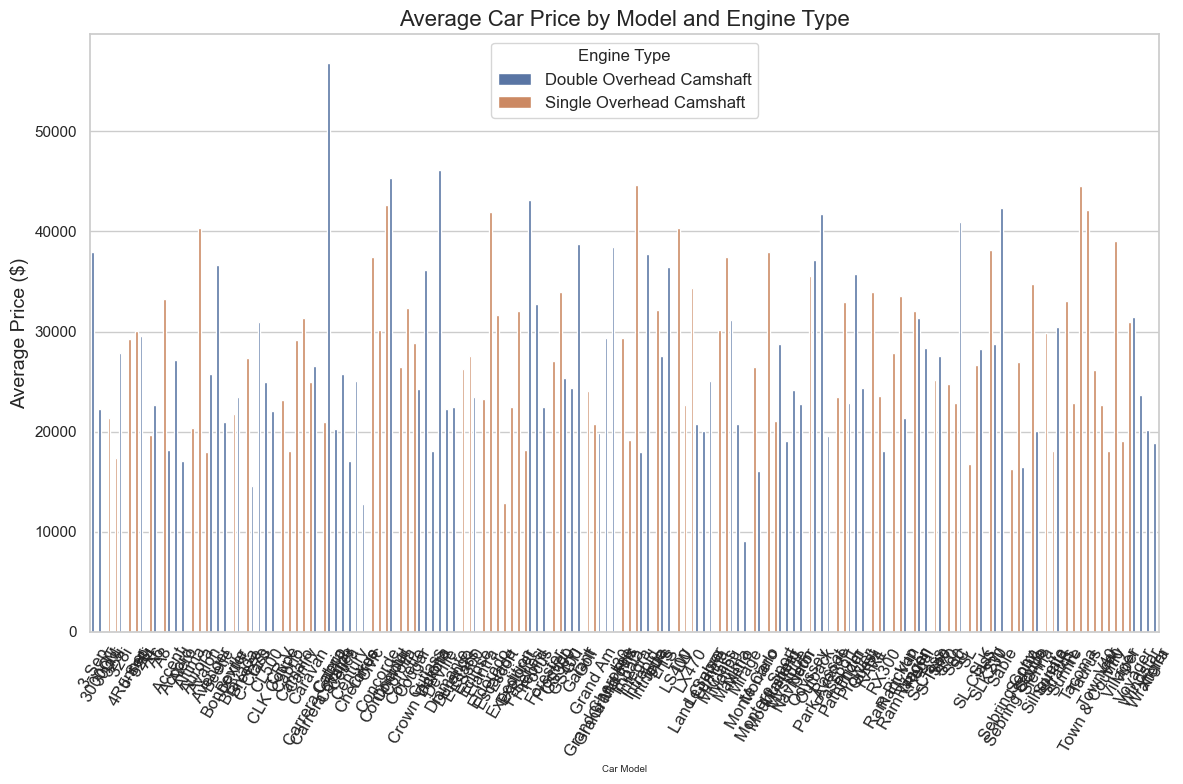

In [35]:
#How does the average car price vary across different car models and engine types?
avg_price_data = df.groupby(['Model'])['Price ($)'].mean().reset_index()
avg_price_data['Engine']=df['Engine']
print(avg_price_data)
# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_data, x='Model', y='Price ($)', hue='Engine')
plt.title('Average Car Price by Model and Engine Type', fontsize=16)
plt.xlabel('Car Model', fontsize=7)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=60, fontsize=12)
plt.legend(title='Engine Type', fontsize=12)
plt.tight_layout()
plt.show()

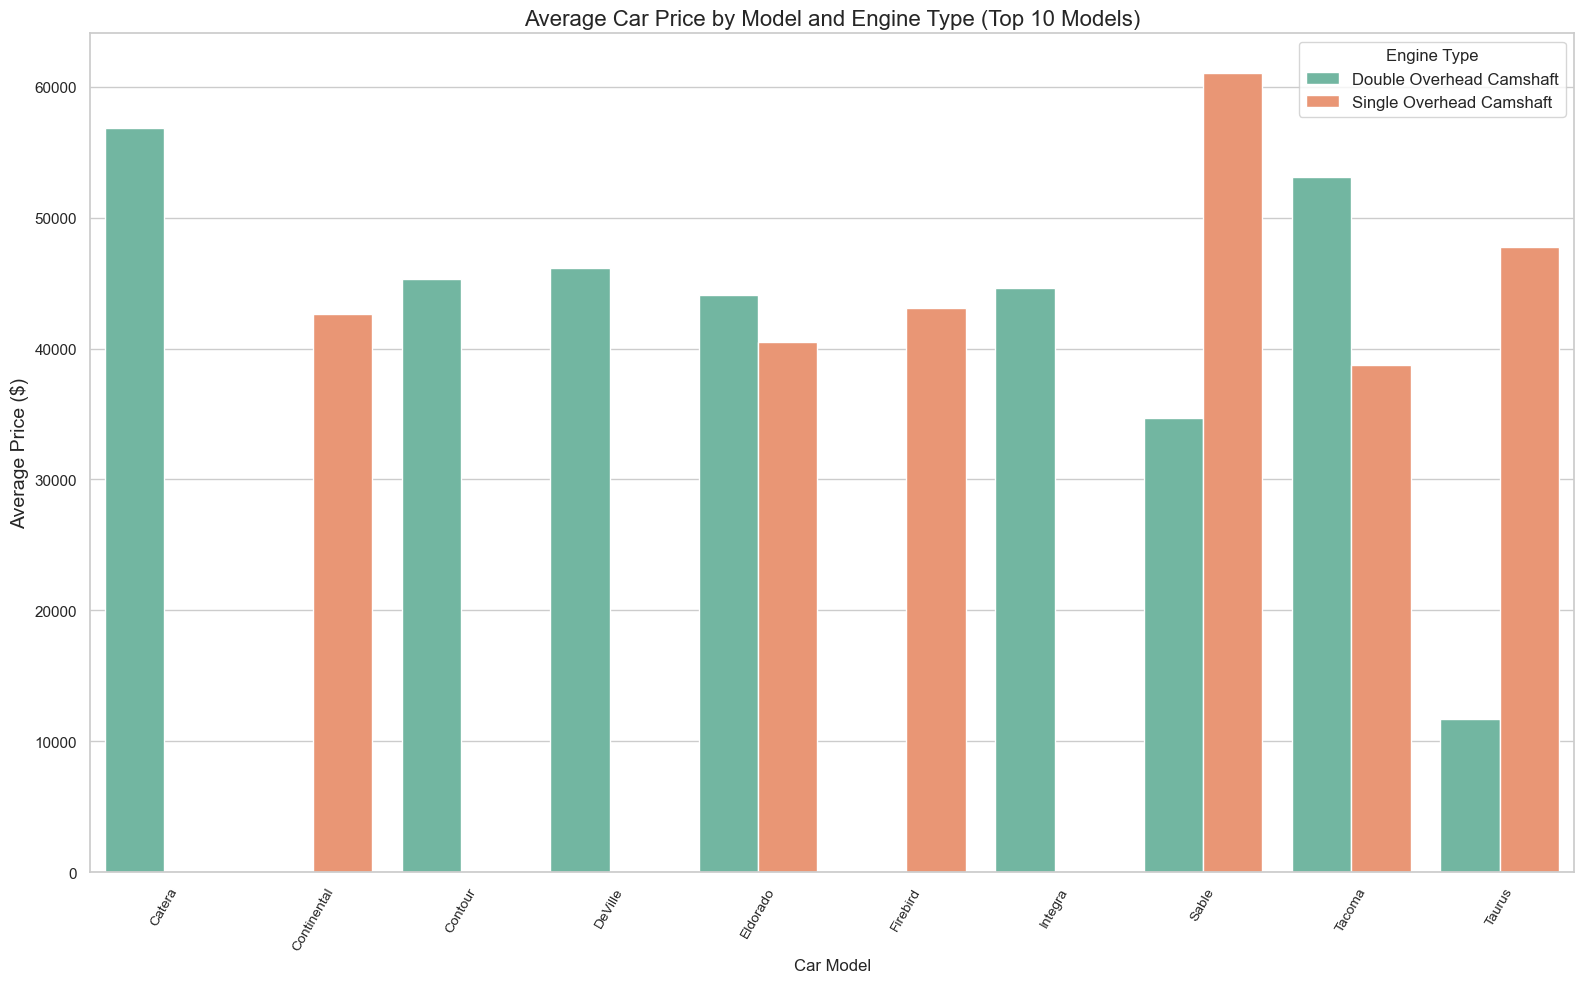

In [36]:
# Filter top 10 models (or adjust as needed)
top_10_models = df.groupby('Model')['Price ($)'].mean().sort_values(ascending=False).head(10).index

# Group and calculate average price
avg_price_data = df[df['Model'].isin(top_10_models)].groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Plot the bar plot with a more aggressive rotation
plt.figure(figsize=(16, 10))
sns.barplot(data=avg_price_data, x='Model', y='Price ($)', hue='Engine', palette='Set2')
plt.title('Average Car Price by Model and Engine Type (Top 10 Models)', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=60, fontsize=10)  # Increased rotation for better visibility
plt.legend(title='Engine Type', fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ha936\Downloads\amazon.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [14]:
#What is the average rating for each product category
df['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, 0. , 2. , 2.6, 2.9])

In [12]:
df['rating']=df['rating'].replace('|',0)

In [13]:
df['rating']=df['rating'].astype(float)

In [16]:
# Group by 'category' and calculate the mean of 'rating'
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Display the result
average_rating_by_category


,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [26]:
#What are the top rating_count products by category
top_rating_count_by_category = df.loc[df.groupby('category')['rating_count']
.idxmax().dropna()]
top_rating_count_by_category[['category', 'product_name', 'rating_count']]

,category,product_name,rating_count
900,Computers&Accessories|Accessories&Peripherals|...,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0
32,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
743,Computers&Accessories|Accessories&Peripherals|...,Amazon Basics Magic Slate 8.5-inch LCD Writing...,401.0
653,Computers&Accessories|Accessories&Peripherals|...,STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...,491.0
940,Computers&Accessories|Accessories&Peripherals|...,HP 330 Wireless Black Keyboard and Mouse Set w...,427.0
...,...,...,...
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
1317,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,535.0
1424,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0
808,OfficeProducts|OfficePaperProducts|Paper|Copy&...,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,388.0


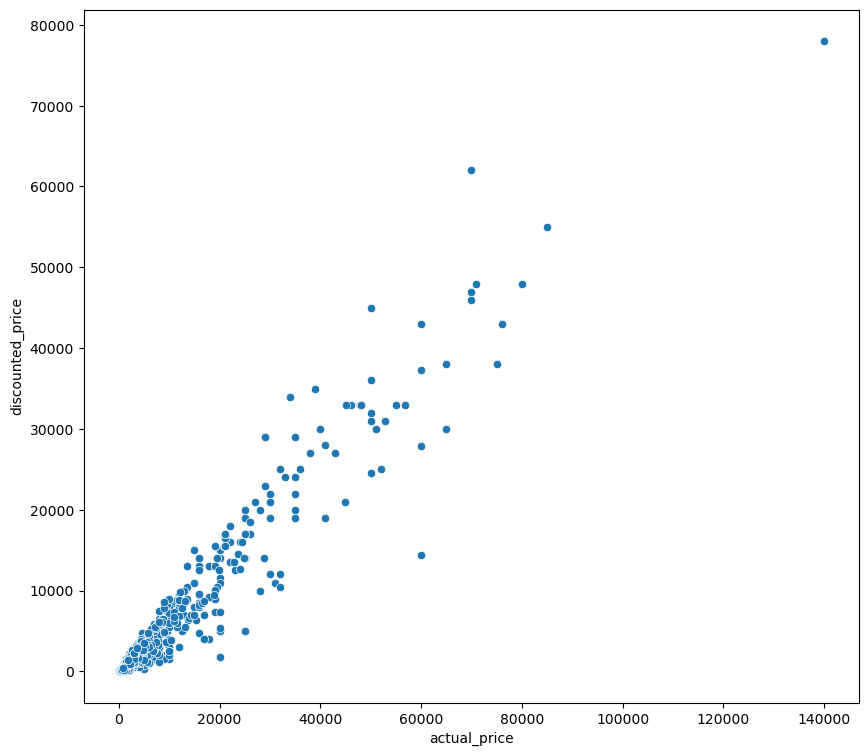

In [42]:
#What is the distribution of discounted prices vs. actual prices

df['discounted_price'] = df['discounted_price'].replace(r'[^0-9.]', '', regex=True)

df['actual_price'] = df['actual_price'].replace(r'[^0-9.]', '', regex=True)

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')


plt.figure(figsize=(10, 9))  # Create a figure with the specified size
sns.scatterplot(x='actual_price', y='discounted_price', data=df)  # Scatter plot
plt.show() 

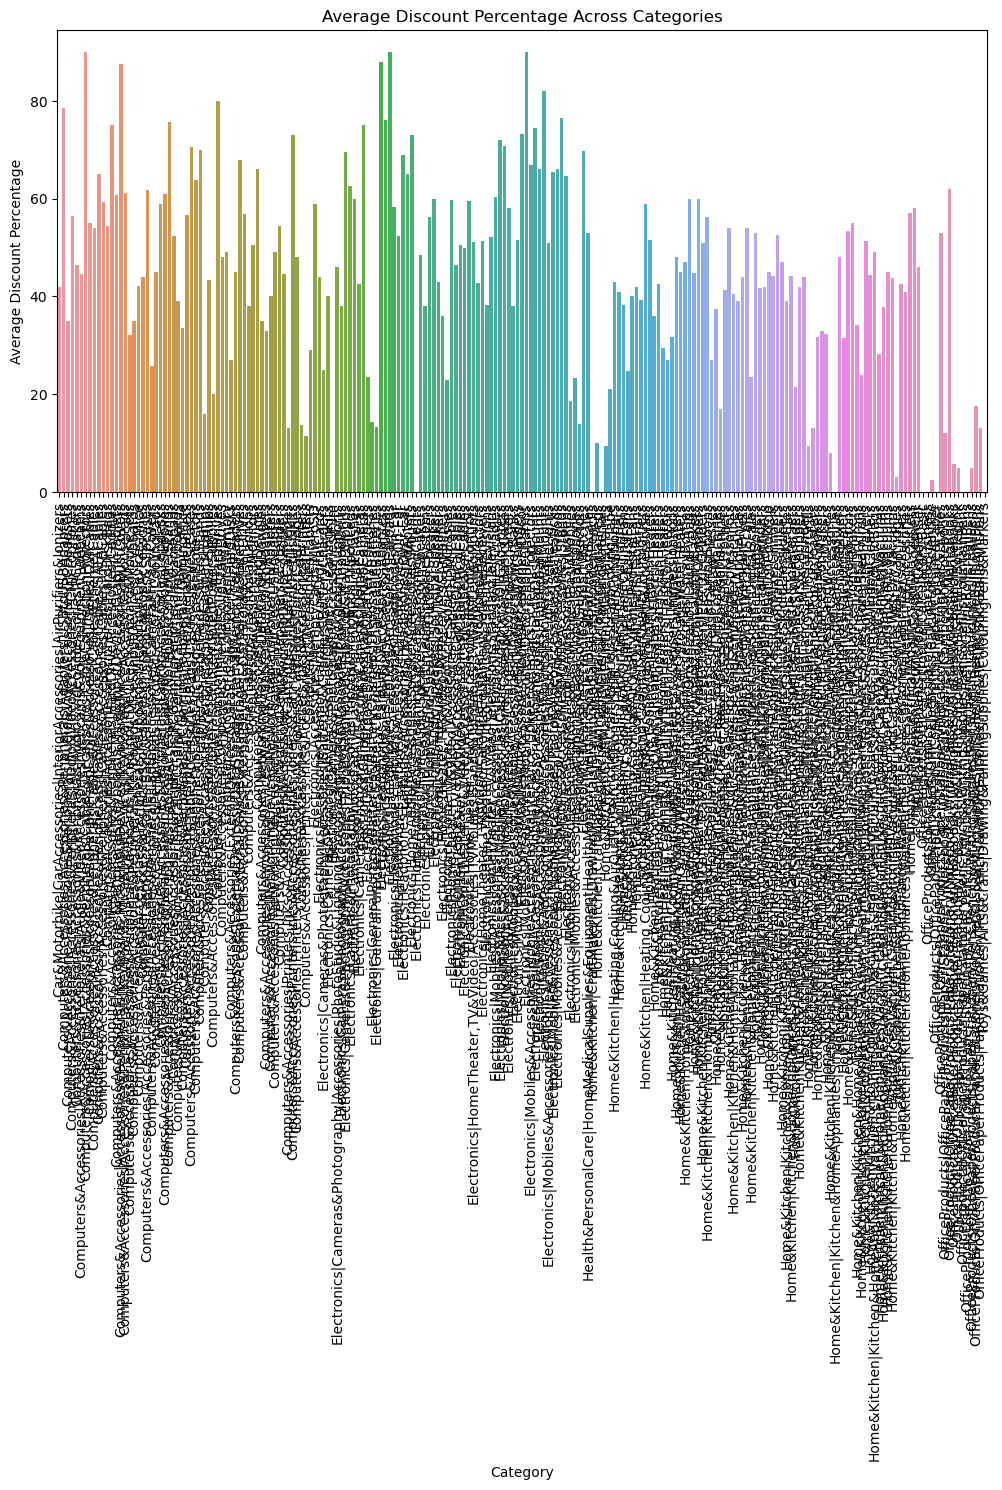

In [62]:
# How does the average discount percentage vary across categories
# Ensure the column is treated as strings first
df['discount_percentage'] = df['discount_percentage'].astype(str)

# Now remove the percentage symbol
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=True)

# Convert the column to numeric (after cleaning)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Calculate the average discount percentage per category
average_discount_percentage = df.groupby('category')['discount_percentage'].mean().reset_index()

# Display the average discount percentage across categories
average_discount_percentage

# Plotting the average discount percentage across categories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='discount_percentage', data=average_discount_percentage)

plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.title('Average Discount Percentage Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')

plt.show()


In [65]:
#What are the most popular product names

product_counts = df['product_name'].value_counts()

# Display the top 10 most popular product names
product_counts

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                           5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                    4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)                  3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                              3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                     3
                                                                             

In [70]:
#What are the most popular product keywords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# Download stopwords (if not already downloaded)


# Initialize stopwords and CountVectorizer
stop_words = stopwords.words('english')  # Get the English stopwords from nltk
vectorizer = CountVectorizer(stop_words=stop_words, lowercase=True, ngram_range=(1, 1))  # unigrams

# Fit and transform the product names to get word counts
X = vectorizer.fit_transform(df['product_name'])

# Sum the occurrences of each word (keyword) and create a DataFrame
keyword_counts = X.toarray().sum(axis=0)
keywords = vectorizer.get_feature_names_out()

# Create a DataFrame with keywords and their frequencies
keyword_freq = pd.DataFrame(list(zip(keywords, keyword_counts)), columns=['Keyword', 'Frequency'])

# Sort by frequency in descending order
keyword_freq = keyword_freq.sort_values(by='Frequency', ascending=False)

# Display the top 10 most popular keywords
top_10_keywords = keyword_freq.head(10)
print(top_10_keywords)


         Keyword  Frequency
1002       black        530
3805         usb        417
1116       cable        414
1206    charging        247
3761        type        243
1714        fast        212
3413       smart        175
3948       white        170
3753          tv        152
1299  compatible        146


In [73]:
#What are the most popular product reviews
stop_words = stopwords.words('english')  # Get the English stopwords from nltk
vectorizer = CountVectorizer(stop_words=stop_words, lowercase=True, ngram_range=(1, 1))  # unigrams

# Fit and transform the reviews to get word counts
X_reviews = vectorizer.fit_transform(df['review_content'])

# Sum the occurrences of each word (review word) and create a DataFrame
review_counts = X_reviews.toarray().sum(axis=0)
review_words = vectorizer.get_feature_names_out()

# Create a DataFrame with words and their frequencies
review_freq = pd.DataFrame(list(zip(review_words, review_counts)), columns=['Review Word', 'Frequency'])
review_freq = review_freq.sort_values(by='Frequency', ascending=False)
review_freq

,Review Word,Frequency
5879,good,6455
9697,product,3947
9922,quality,2417
12961,use,1730
8746,one,1456
...,...,...
4373,dismantling,1
4374,disney,1
9479,positions,1
4375,dispatch,1


In [74]:
#What is the correlation between discounted_price and rating
# Ensure 'discounted_price' and 'rating' are numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = df[['discounted_price', 'rating']].corr().iloc[0, 1]

print(f"The correlation between discounted price and rating is: {correlation}")


The correlation between discounted price and rating is: 0.11429770050484787


In [75]:
# What are the Top 5 categories based on the highest ratings
# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the average rating per category
average_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sort categories by average rating in descending order
top_5_categories = average_ratings.sort_values(by='rating', ascending=False).head(5)

# Display the top 5 categories
top_5_categories


,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
196,OfficeProducts|OfficeElectronics|Calculators|B...,4.5


In [76]:
#Identify any potential areas for improvement or optimization based on the data analysis
'''
1. Handling Missing or Inconsistent Data
Issue: If some columns (e.g., discounted_price, rating, discount_percentage) contain missing or inconsistent values, this can affect the analysis and insights.
Action:
Impute missing values (e.g., using the median or mean for numerical columns like discounted_price, rating, or discount_percentage).
Check for outliers: Extreme values may not represent real data. Identifying and handling them could improve the accuracy of the analysis.
2. Improving the Quality of Product Names
Issue: Product names are often free text, and some might have special characters, different formats, or inconsistent naming conventions that could affect keyword extraction and analysis.
Action:
Clean the text in product names (e.g., removing special characters, converting to lower case).
Consider stemming or lemmatization to reduce words to their root form. For example, “running” and “ran” could both be treated as “run”.
3. Optimizing the Use of Discounted Price and Rating
Issue: There might be products with high ratings but low discounts, or high discounts but low ratings. Understanding the relationship between these two could help optimize pricing strategies.
Action:
Correlation Analysis: Calculate the correlation between discounted_price and rating. If there's little correlation, consider revisiting the pricing strategy.
Price Segmentation: If the correlation is low, segment the products into different pricing tiers (e.g., low, medium, high-priced items) and analyze ratings within each segment.
4. Category Analysis
Issue: Some categories might have disproportionately high or low ratings, or some categories might be underrepresented.
Action:
Category-Based Analysis:
Investigate categories with high average ratings. Are these categories more likely to have higher ratings due to the type of products they sell? You can suggest marketing or product strategy changes for low-rated categories.
Ensure that categories are well-represented across the product range. If some categories have fewer products, that may affect the accuracy of the analysis.
5. Discount Optimization
Issue: If there is a large variation in the discount_percentage (some products are heavily discounted while others have no discount), it might be worth investigating how discounts impact sales and ratings.
Action:
Analyze Discount Impact: Examine whether higher discount percentages lead to higher ratings or more sales. If the correlation is weak, it could indicate that the discount strategy isn’t effective.
Discount Segmentation: Segment products by their discount ranges and check if specific ranges (e.g., 10-20% off) lead to more favorable customer ratings.
6. Improve Keyword Analysis
Issue: If the product keywords are not optimized, certain relevant products may not show up in searches or might be overlooked in the analysis.
Action:
Focus on Relevant Keywords: Conduct a more detailed keyword analysis on the most popular products. This can help identify which keywords are associated with higher ratings and discounts, providing valuable insights for product descriptions and SEO.
N-Grams: While you’re already analyzing unigrams (single words), you could consider bigrams or trigrams (pairs or triplets of words) to capture more contextual keywords that might be important (e.g., “wireless charger” vs. just “wireless”).
7. Data Visualizations and Interpretation
Issue: The visualizations might be missing more sophisticated insights or may not fully convey the nuances of the data.
Action:
Advanced Visualizations:
Use heatmaps to show the correlation between different features (e.g., discount_percentage, rating, and actual_price).
Create box plots to show the distribution of ratings or prices across different categories, which might uncover patterns that aren't visible in average calculations.
Time-Based Analysis: If the dataset includes time-related data (e.g., date added), analyze trends over time (e.g., average ratings over the months, discount frequency).
8. Optimize User Experience
Issue: The dataset suggests that users leave reviews along with ratings. Understanding the relationship between reviews and ratings can help improve customer engagement strategies.
Action:
Sentiment Analysis: Perform sentiment analysis on product reviews to understand customer feelings about the products in more depth. This could help identify areas of improvement or popular features.
Review Length and Quality: Check if longer reviews correlate with higher or lower ratings, and assess whether improving review quality might enhance user trust and product sales.
9. Feature Engineering
Issue: The features in the dataset may not fully capture important product characteristics that could help with decision-making.
Action:
Create New Features: For example, you can derive a "price-to-discount ratio" or a "rating-to-price ratio" to identify highly rated products with good discounts or vice versa.
Clustering: Use clustering techniques (e.g., K-means) to group products by similar characteristics and analyze how ratings vary across clusters.
10. Pricing Strategy and Competitor Comparison
Issue: The product prices might be not optimized for market competitiveness.
Action:
Analyze whether there’s any data on competitor prices (if available) to compare with the actual_price. If the products in your dataset are priced higher but have lower ratings, pricing optimization could be a key area for improvement.
'''

'\n1. Handling Missing or Inconsistent Data\nIssue: If some columns (e.g., discounted_price, rating, discount_percentage) contain missing or inconsistent values, this can affect the analysis and insights.\nAction:\nImpute missing values (e.g., using the median or mean for numerical columns like discounted_price, rating, or discount_percentage).\nCheck for outliers: Extreme values may not represent real data. Identifying and handling them could improve the accuracy of the analysis.\n2. Improving the Quality of Product Names\nIssue: Product names are often free text, and some might have special characters, different formats, or inconsistent naming conventions that could affect keyword extraction and analysis.\nAction:\nClean the text in product names (e.g., removing special characters, converting to lower case).\nConsider stemming or lemmatization to reduce words to their root form. For example, “running” and “ran” could both be treated as “run”.\n3. Optimizing the Use of Discounted Pric

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ha936\Downloads\spotify.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [13]:
#Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
df.isnull().sum() # no null value present


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [16]:
duplicates = df[df.duplicated()]
duplicates
df.drop_duplicates(inplace=True)


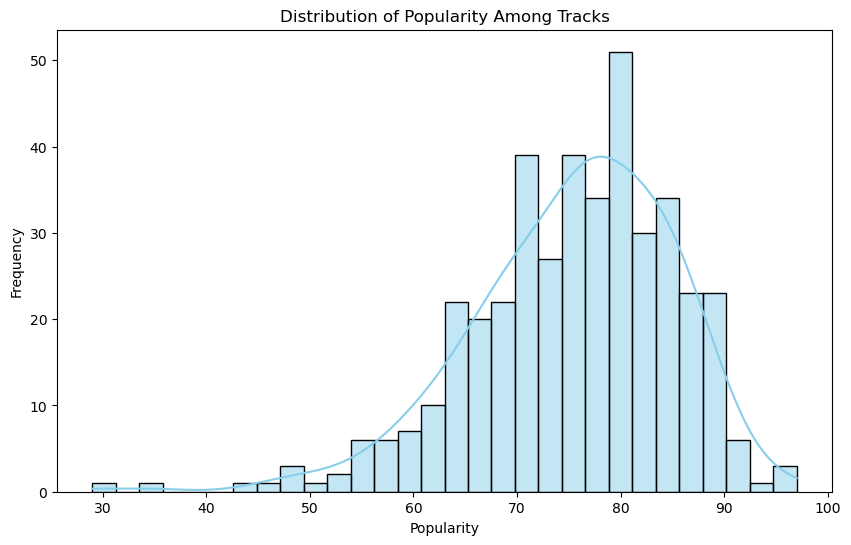

In [18]:
#What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
# Set up the figure size
plt.figure(figsize=(10, 6))

# Plot histogram for 'Popularity' column
sns.histplot(df['Popularity'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Display the plot
plt.show()


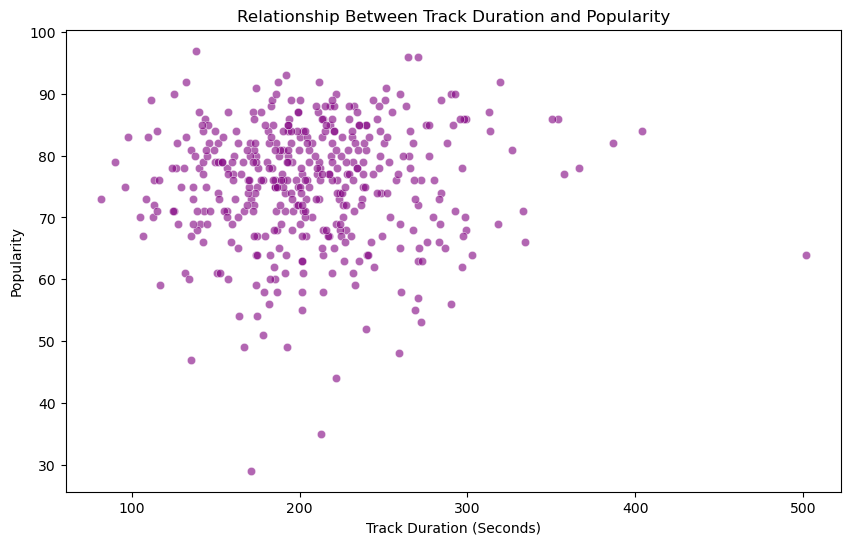

In [19]:
#Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

# Convert 'Duration (ms)' from milliseconds to seconds for easier interpretation
df['Duration (s)'] = df['Duration (ms)'] / 1000  # Convert to seconds

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='Duration (s)', y='Popularity', data=df, color='purple', alpha=0.6)

# Add labels and title
plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Track Duration (Seconds)')
plt.ylabel('Popularity')

# Display the plot
plt.show()


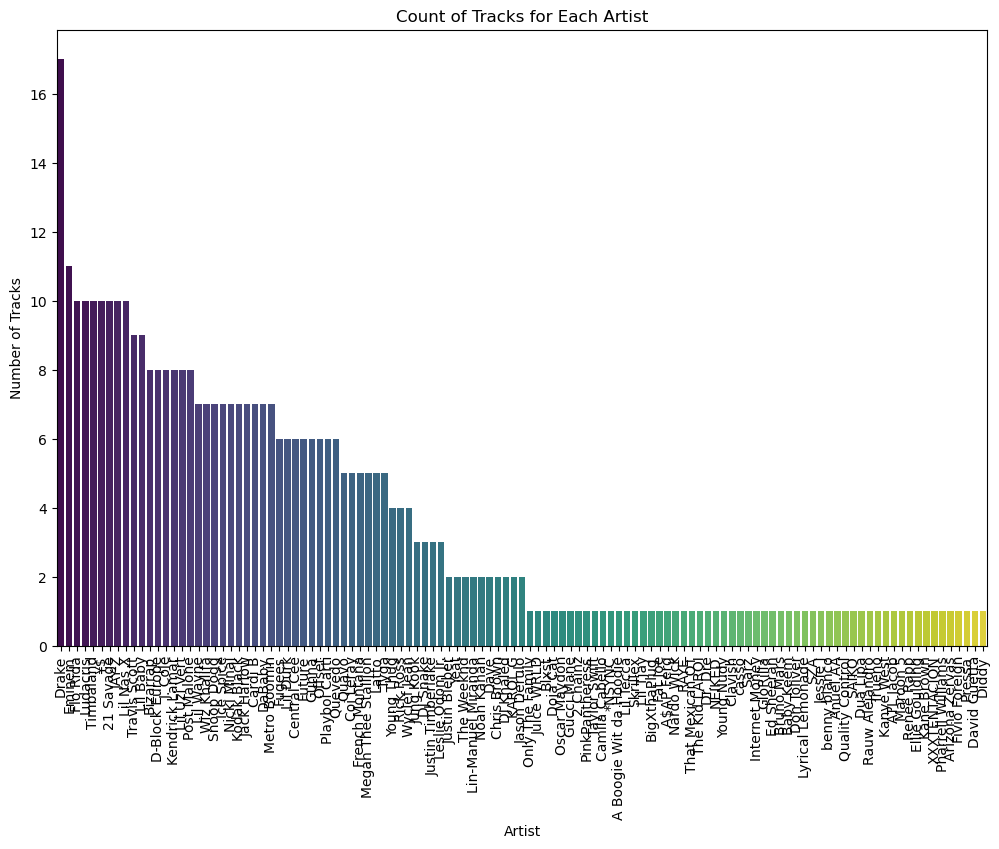

In [20]:
#Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the countplot to show the number of tracks for each artist
sns.countplot(x='Artist', data=df, palette='viridis', order=df['Artist'].value_counts().index)

# Add title and labels
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [21]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
# Sort the dataset by popularity in ascending order to get the least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)

# Display the artist name and track name of the top 5 least popular tracks
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [22]:
# Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
# Calculate the average popularity for each artist
average_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()

# Sort artists by their average popularity in descending order to get the top 5 most popular artists
top_5_artists = average_popularity_per_artist.sort_values(ascending=False).head(5)

# Display the average popularity for each of the top 5 artists
top_5_artists


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [23]:
# For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
# Step 1: Get the top 5 most popular artists (based on average popularity)
top_5_artists = average_popularity_per_artist.sort_values(ascending=False).head(5)

# Step 2: For each of the top 5 artists, find their most popular track
most_popular_tracks = {}
for artist in top_5_artists.index:
    # Filter the dataset for the current artist
    artist_tracks = df[df['Artist'] == artist]
    
    # Find the track with the highest popularity
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    
    # Store the track name for the artist
    most_popular_tracks[artist] = most_popular_track['Track Name']

# Step 3: Display the most popular tracks for the top 5 artists
most_popular_tracks


{'cassö': 'Prada',
 'Trueno': 'Mamichula - con Nicki Nicole',
 'David Guetta': "Baby Don't Hurt Me",
 'Travis Scott': 'FE!N (feat. Playboi Carti)',
 '¥$': 'CARNIVAL'}

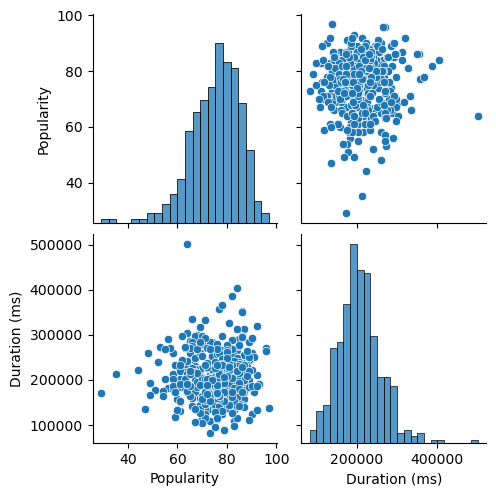

In [24]:
#Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Select relevant numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create the pair plot
sns.pairplot(df[numerical_columns])

# Display the plot
plt.show()

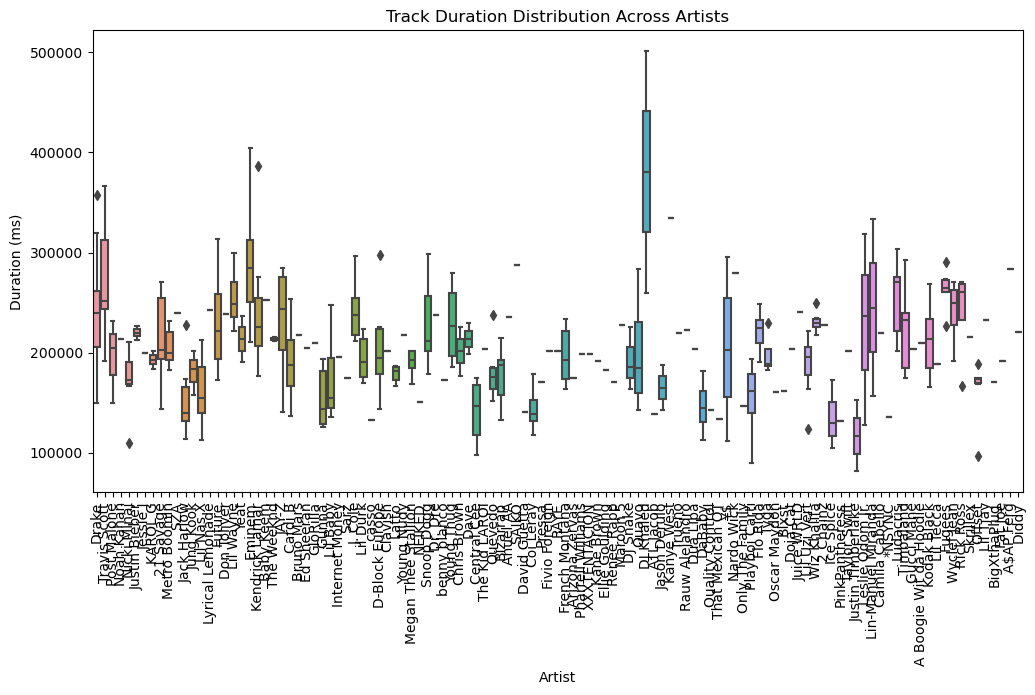

In [25]:
#Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)  # Rotate the artist names for better visibility
plt.title('Track Duration Distribution Across Artists')
plt.show()

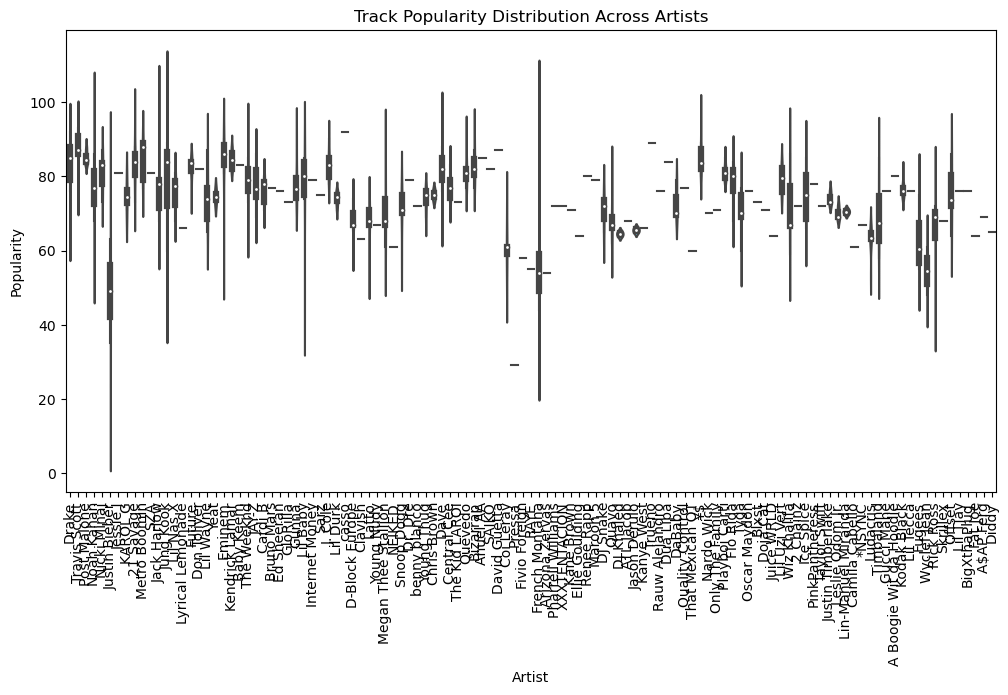

In [26]:
#How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)  # Rotate the artist names for better visibility
plt.title('Track Popularity Distribution Across Artists')
plt.show()

In [17]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
